In [26]:
import scipy.io 


In [27]:
MNISTmini = scipy.io.loadmat('MNISTmini.mat')
MNISTmini

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Oct  8 18:13:47 2016',
 '__version__': '1.0',
 '__globals__': [],
 'train_fea1': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'train_gnd1': array([[ 1],
        [ 1],
        [ 1],
        ...,
        [10],
        [10],
        [10]], dtype=uint8),
 'test_fea1': array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ..., 64,  0,  0],
        [ 0,  0,  0, ..., 25,  0,  0]], dtype=uint8),
 'test_gnd1': array([[ 1],
        [ 1],
        [ 1],
        ...,
        [10],
        [10],
        [10]], dtype=uint8)}

In [28]:
import numpy as np
true_class = MNISTmini['train_gnd1']
test_fea_true_class = MNISTmini['test_gnd1']
true_class

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [10],
       [10],
       [10]], dtype=uint8)

In [29]:
true_class = true_class.flatten()
test_fea_true_class = test_fea_true_class.flatten()
true_class

array([ 1,  1,  1, ..., 10, 10, 10], dtype=uint8)

In [30]:
indexes = np.concatenate((np.where(true_class==5)[0], np.where(true_class==9)[0]))
test_fea_indeces = np.concatenate((np.where(test_fea_true_class==5)[0], np.where(test_fea_true_class==9)[0]))
indexes

array([24673, 24674, 24675, ..., 54074, 54075, 54076], dtype=int64)

In [31]:
imgs = MNISTmini['train_fea1']
test_fea = MNISTmini['test_fea1']
imgs


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
imgs_5_9 = []
true_label = []
test_fea_5_9 = []
test_true_label = []
for i in indexes:
    imgs_5_9.append(imgs[i])
    true_label.append(true_class[i])
imgs_5_9 = np.array(imgs_5_9)
true_label = np.array(true_label)

for i in test_fea_indeces:
    test_fea_5_9.append(test_fea[i])
    test_true_label.append(test_fea_true_class[i])
test_fea_5_9 = np.array(test_fea_5_9)
test_true_label = np.array(test_true_label)
imgs_5_9

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
clf = LogisticRegression(random_state=0).fit(imgs_5_9, true_label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
test_predict = clf.predict(test_fea_5_9)

In [35]:
clf.score(test_fea_5_9, test_true_label)

0.9805365597054182

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_true_label, test_predict )

Text(69.0, 0.5, 'Truth')

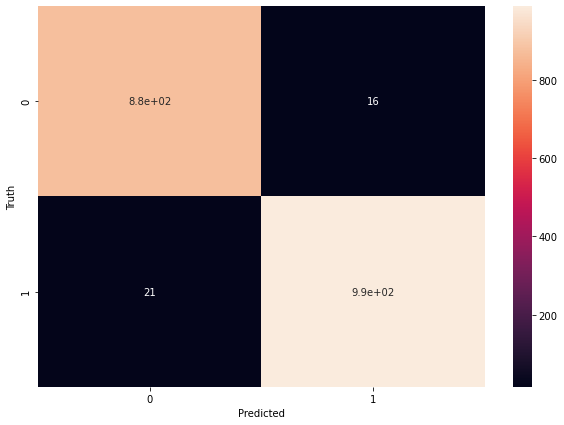

In [37]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')